# K-Nearest Neighbors Classifier - the Random Dataset

### Introducing the database


In this exercise, a **randomly generated database** will be used. Generating datasets is a valuable skill, as it enables **exploration of algorithms** without the complexities of preprocessing. Real-world datasets often require dealing with tasks like encoding, standardizing, and handling outliers, but with randomly generated data, these challenges are minimized.

One of the main advantages of using such datasets is the full control they provide. The number of features, the number of classes, and the distribution of data points can all be customized, offering complete flexibility.

This exercise presents an exciting opportunity to **experiment with algorithms** and **explore various approaches**, encouraging experimentation and learning throughout the process.

### Importing the necessary libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions

### Generating the database

In [2]:
inputs, target = make_blobs(n_samples=1000,
                            centers = [(-4,4), (1,1), (3,4)],
                            random_state = 10214)

In [3]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [4]:
data = pd.DataFrame(data=inputs, columns=['C1', 'C2'])
data['target'] = target
data

,C1,C2,target
0,-4.530245,4.417280,0
1,-5.368642,4.380035,0
2,5.350702,3.326498,2
3,-4.333554,3.796103,0
4,0.739349,1.577041,1
...,...,...,...
995,-4.103359,3.575941,0
996,2.463336,4.263302,2
997,3.322970,3.328315,2
998,-0.949316,1.797767,1


### Plotting the database

In [5]:
sns.set()
plt.figure(figsize = (16,9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Axes: xlabel='C1', ylabel='C2'>

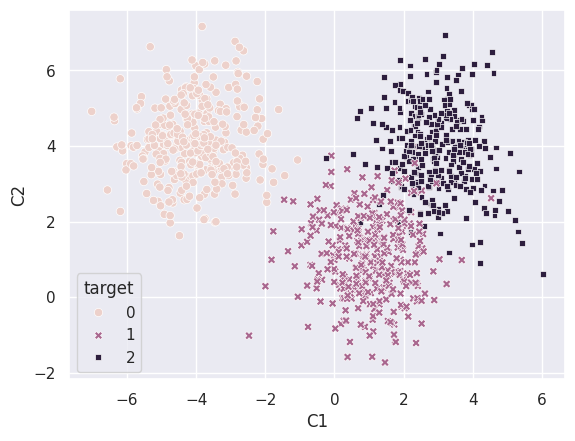

In [6]:
sns.scatterplot(x='C1', y='C2', data = data, hue='target', style='target')

### Visualizing the distribution of the points

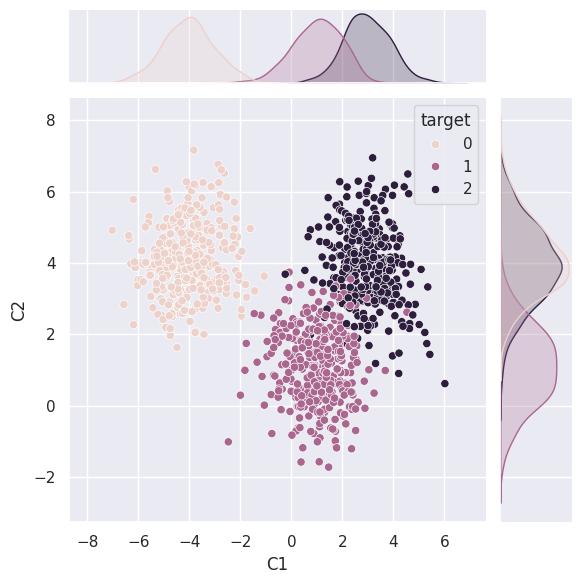

In [7]:
sns.set()
sns.jointplot(x='C1', y='C2',
              data=data,
              hue='target',
              height= 6,
              legend=True)

### Creating a train-test-split

In [8]:
x_train, x_test,y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=10214)

### Creating the model

In [9]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

### Predicting a sample

In [10]:
x, y = -0.6, 3.5

In [11]:

clf.predict([[x,y]])

array([1])

In [12]:
ngb = clf.kneighbors([[x,y]])
ngb

(array([[0.40342984, 0.48537215, 0.5408188 , 0.56347746, 0.63544142,
         0.74376382, 0.88725584, 0.97488133, 1.1329942 , 1.16658191,
         1.21033106, 1.21305381, 1.24908106, 1.25812164, 1.36793624]]),
 array([[370, 554, 228, 297, 569, 619,  17, 478,  93, 732, 223, 381,  22,
         159, 375]]))

### Visualizing the neighbors

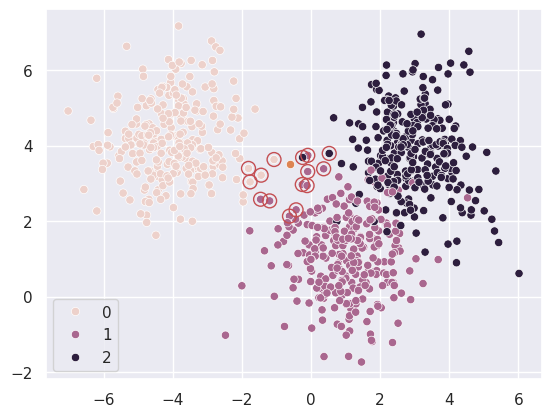

In [13]:
sns.set()
sns.scatterplot(x=x_train[:,0], y=x_train[:,1],
              hue=y_train,
              legend=True);


sns.scatterplot(x=[x], y=[y],
              style=[y], markers = ['o'],
              legend=False);

plot_x_train = []
plot_y_train = []

for i in ngb[1]:
  plot_x_train.append(x_train[i,0])
  plot_y_train.append(x_train[i,1])


plt.scatter(plot_x_train, plot_y_train, s=100,
            facecolors='none', edgecolors='r')

### Getting the parameters of the model

In [14]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

### Drawing the decision regions

In [15]:
x_train.shape

(800, 2)

Time elapsed: 17.6 seconds


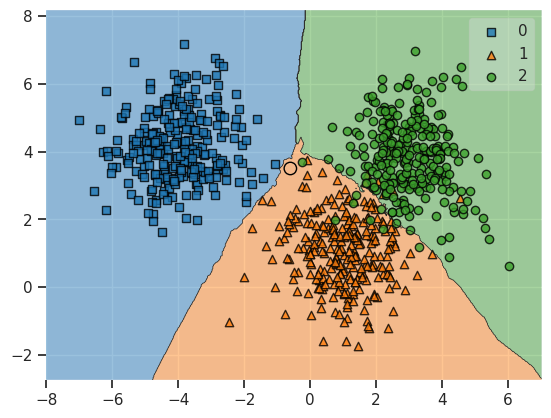

In [16]:
start=time.time()
plot_decision_regions(X=x_train, y=y_train,
                      X_highlight=np.array([[x,y]]),
                      clf=clf)
end =time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

### Getting the error rates of a set of models

### Plotting the error rates as a function of the number of neighbors

### Choosing a set of parameters to test

### Create an instance of the GridSearchCV class

### Make predictions on the test dataset

### Construct the confusion matrix

### Print out the classification report